<a href="https://colab.research.google.com/github/Elman295/Self_driving_car/blob/main/Lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

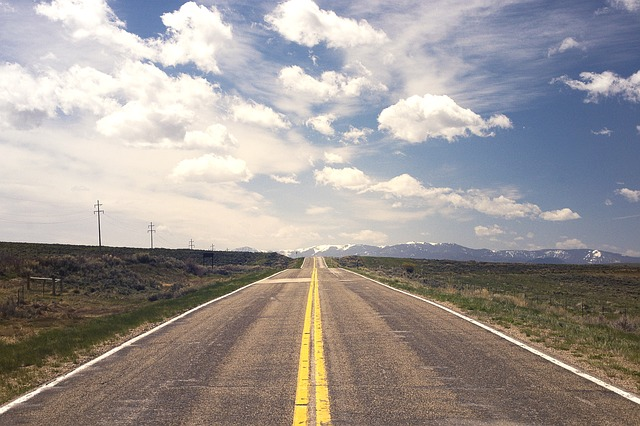

In [4]:
img = cv.imread("test5.jpg")
cv2_imshow(img)

(426, 640, 3)
(426, 640)


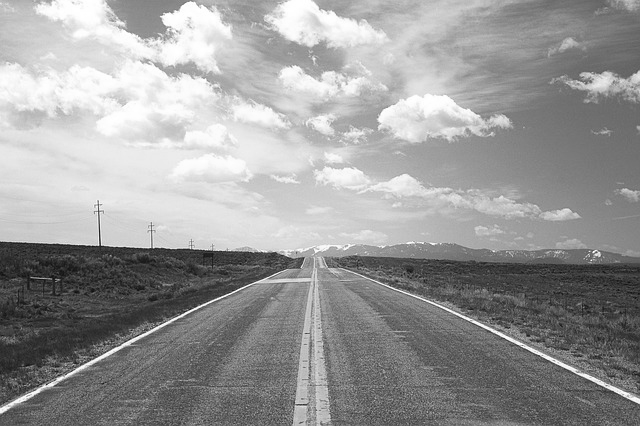

In [6]:
print(img.shape)
img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
print(img_gray.shape)
cv2_imshow(img_gray)

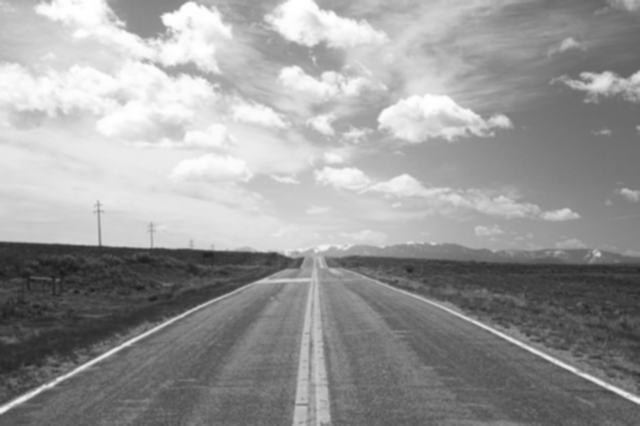

In [8]:
img_blur = cv.GaussianBlur(img_gray, (5,5), 0)
cv2_imshow(img_blur)

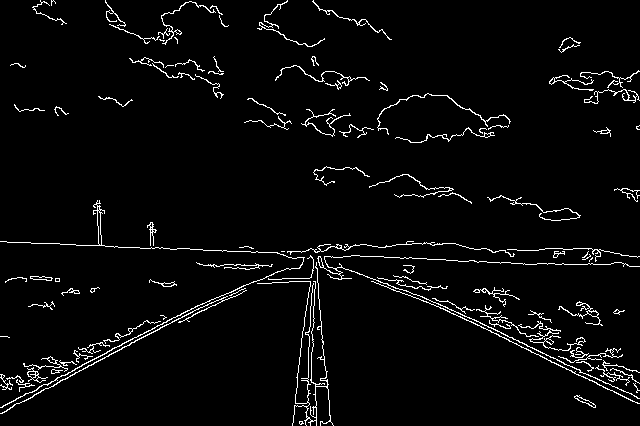

In [9]:
canny = cv.Canny(img_blur,50,150)
cv2_imshow(canny)

In [10]:
def canny(img):
  img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  img = cv.GaussianBlur(img, (5,5),0)
  img = cv.Canny(img, 50, 150)
  return img

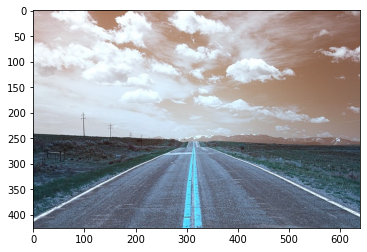

In [11]:
plt.imshow(img)
plt.show()

points : <br/>

(300, h)
<br/>
(300,280)
<br/>
(600, h)

In [49]:
def interest_region_bw(img):
  h = img.shape[0]
  points = np.array([[(300,h),(300,250),(660,h - 40)]])
  frame = np.zeros_like(img)
  cv.fillPoly(frame, points, (255,255,255))
  return frame


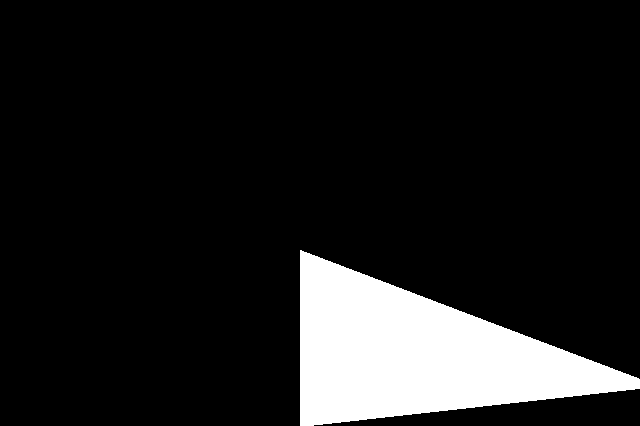

In [50]:
region = interest_region_bw(img) 
cv2_imshow(region)

In [51]:
def interest_region(img):
  frame = interest_region_bw(img)
  frame = cv.bitwise_and(img, frame) 
  return frame

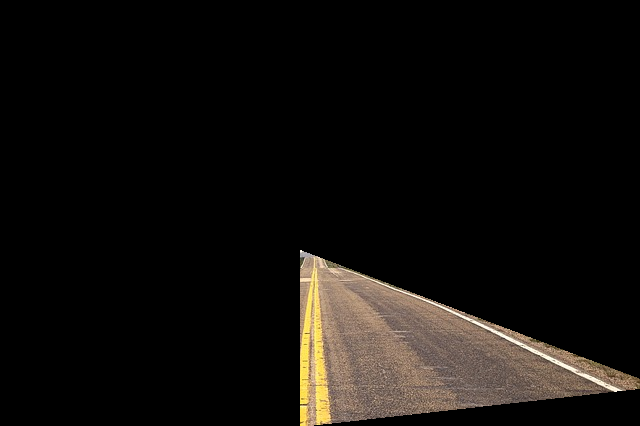

In [52]:
region = interest_region(img)
cv2_imshow(region)

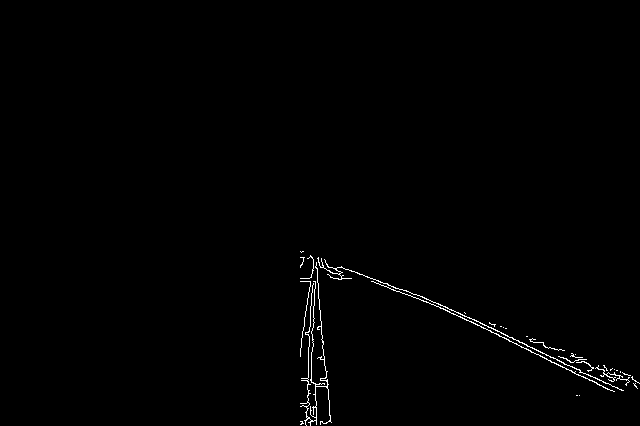

In [54]:
mask = canny(img)
region_canny = interest_region(mask) 
cv2_imshow(region_canny)

In [64]:
lines = cv.HoughLinesP(region_canny,1,np.pi/180, 50, np.array([]),50,10)

In [65]:
print(lines)

[[[438 306 614 391]]

 [[474 319 621 390]]

 [[372 281 442 308]]

 [[341 266 451 309]]

 [[318 295 331 422]]

 [[306 425 311 293]]

 [[311 363 315 281]]

 [[300 356 313 259]]

 [[484 325 547 355]]

 [[577 360 635 383]]]
